In [3]:
import cv2
# from PIL import Image
import matplotlib.pyplot as plt

In [4]:
print(cv2.__version__)

4.1.2


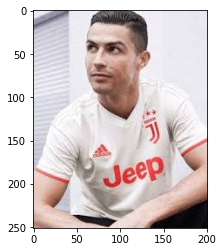

In [5]:
# Open image using openCV2
img = cv2.imread("ronaldo.jpeg")
  
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# using pillow
# pil_image = Image.fromarray(color_coverted)
# pil_image.show()

# using matplotlib
# plt.figure(figsize=(10,10))
plt.imshow(color_coverted)
plt.show()

In [6]:
img.shape

(251, 201, 3)

In [7]:
img

array([[[233, 231, 231],
        [231, 229, 229],
        [229, 227, 227],
        ...,
        [237, 231, 232],
        [236, 230, 231],
        [236, 230, 231]],

       [[238, 236, 236],
        [236, 234, 234],
        [233, 231, 231],
        ...,
        [237, 231, 232],
        [237, 231, 232],
        [237, 231, 232]],

       [[243, 238, 239],
        [241, 236, 237],
        [239, 234, 235],
        ...,
        [237, 231, 232],
        [237, 231, 232],
        [237, 231, 232]],

       ...,

       [[130, 144, 193],
        [136, 150, 199],
        [131, 145, 194],
        ...,
        [ 11,   8,  10],
        [  9,   6,   8],
        [  9,   6,   8]],

       [[127, 141, 190],
        [134, 148, 197],
        [129, 143, 192],
        ...,
        [ 11,   8,  10],
        [  9,   6,   8],
        [  9,   6,   8]],

       [[122, 138, 185],
        [129, 145, 192],
        [126, 142, 189],
        ...,
        [ 11,   8,  10],
        [  9,   6,   8],
        [  9,   6,   8]]

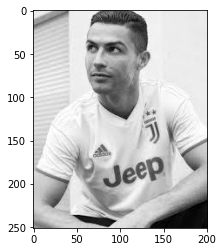

In [8]:
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Displaying the converted image
color_coverted = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
# pil_img = Image.fromarray(color_coverted)
# pil_img.show()

plt.imshow(color_coverted)
plt.show()

In [28]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()


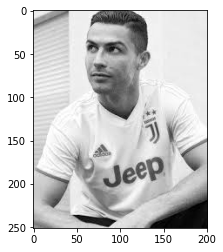

In [29]:
displayImage(grayImage)

In [30]:
grayImage.shape

(251, 201)

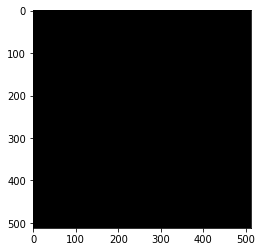

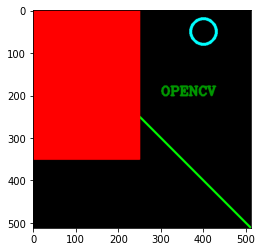

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((512,512,3), np.uint8)

displayImage(img)

# how to change to color
# img[:] = 255,0,0

# color some parts
# img[200:300,100:300] = 255,0,0

# draw a line
cv2.line(img,(0,0),(300,300),(0,255,0),3)

# img.shape[1] is width, img.shape[0] is heigth
cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),3)

#draw rectangle
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2)

#draw rectangle (filled)
cv2.rectangle(img,(0,0),(250,350),(0,0,255),cv2.FILLED)

# draw circle
cv2.circle(img, (400,50),30,(255,255,0),5)

# parameters: image,what is the text,start point,font, scale,color, thickness
cv2.putText(img,"OPENCV",(300,200),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0), 3)


displayImage(img)

In [32]:
#Otsu thresholding
# ret, blackAndWhiteImage = cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

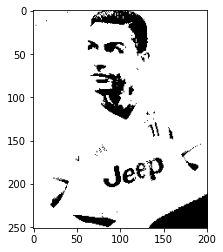

In [33]:
# Displaying the converted image
# pil_img = Image.fromarray(blackAndWhiteImage)
# pil_img.show()

displayImage(blackAndWhiteImage)

Convolution

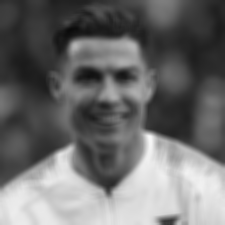

Now, lets create a box filter

In [34]:
kernel = np.ones((3,3), np.float32)/9 # box filter

In [35]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

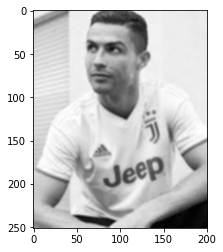

In [36]:
img = cv2.imread("ronaldo.jpeg")
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
convolvedImg = cv2.filter2D(grayImage, -1,kernel)

# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()

displayImage(convolvedImg)

Image Blurring
https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

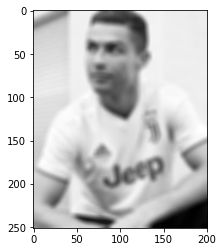

In [37]:
imgBlur = cv2.GaussianBlur(grayImage,(7,7),5)
# median = cv2.medianBlur(img,5)
# blur = cv2.bilateralFilter(img,9,75,75)

# Displaying the converted image
# pil_img = Image.fromarray(imgBlur)
# pil_img.show()

displayImage(imgBlur)

In [38]:
# lets try to sharpen the image

kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])

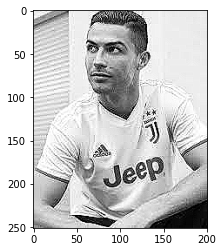

In [39]:
convolvedImg = cv2.filter2D(grayImage, -1,kernel)
# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()
displayImage(convolvedImg)

Canny Edge Detection: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

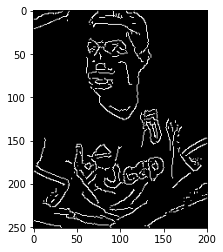

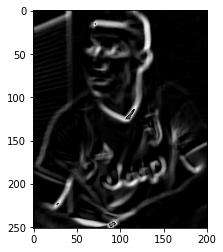

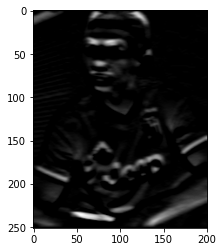

In [41]:
# canny
imgCanny = cv2.Canny(imgBlur,20,70)

# sobel
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely

# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,-1]])
img_prewittx = cv2.filter2D(imgBlur,-1,kernelx)
img_prewitty = cv2.filter2D(imgBlur,-1,kernely)
imgPrewitt = img_prewittx + img_prewitty

# # Displaying the converted image
# pil_img = Image.fromarray(imgCanny)
# pil_img.show()

# pil_img = Image.fromarray(imgSobel)
# pil_img.show()

# pil_img = Image.fromarray(imgPrewitt)
# pil_img.show()

displayImage(imgCanny)
displayImage(imgSobel)
displayImage(imgPrewitt)

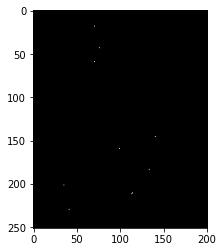

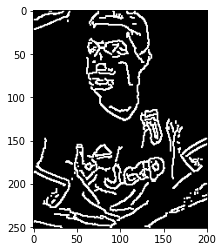

In [42]:
kernel = np.ones((2,2),np.uint8)

img_erosion = cv2.erode(imgCanny, kernel, iterations=1)
img_dilation = cv2.dilate(imgCanny, kernel, iterations=1)

# pil_img = Image.fromarray(img_erosion)
# pil_img.show()

# pil_img2 = Image.fromarray(img_dilation)
# pil_img2.show()

displayImage(img_erosion)
displayImage(img_dilation)
